In [1]:
# =============================================================================
# Imports and Notebook Settings
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm

sns.set_style("whitegrid")

In [2]:
# Set base directory
from pathlib import Path
BASE_DIR = Path(r"/Users/apple/Desktop/2025_research_paper_lam/OxTemp_Annual/")

In [3]:
# =============================================================================
# Load Data
# =============================================================================
df_mort_ozone_temp_veh = pd.read_pickle(BASE_DIR / "Processed" / "df_mort_ozone_temp_veh.pkl")
df_mort_ozone_temp_veh = df_mort_ozone_temp_veh[(df_mort_ozone_temp_veh["year"] >= 1978) &
                                                (df_mort_ozone_temp_veh["year"] <= 2022)]
df_mort_ozone_temp_veh.head()


,year,age_group,Deaths,sex,Population,daily_mean,daily_max,daily_min,max_temp,min_temp,...,mean_max_hourly_ppm,mean_annual_daytime_peak_ppm,mean_days_over_0_06_lag1,mean_hours_over_0_06_lag1,mean_max_hourly_ppm_lag1,mean_annual_daytime_peak_ppm_lag1,filename,filepath,place,vehicles
620,1978,0,512.69,Female,77688.82,16.1,20.0,12.6,36.3,-2.0,...,0.119048,0.029952,54.238095,145.47619,0.151905,0.048476,e49tph00000005be.xls,/Users/apple/Desktop/2025_research_paper_lam/O...,Tokyo,2828315.0
621,1978,1-4,170.16,Female,342693.45,16.1,20.0,12.6,36.3,-2.0,...,0.119048,0.029952,54.238095,145.47619,0.151905,0.048476,e49tph00000005be.xls,/Users/apple/Desktop/2025_research_paper_lam/O...,Tokyo,2828315.0
622,1978,5-14,157.11,Female,814168.25,16.1,20.0,12.6,36.3,-2.0,...,0.119048,0.029952,54.238095,145.47619,0.151905,0.048476,e49tph00000005be.xls,/Users/apple/Desktop/2025_research_paper_lam/O...,Tokyo,2828315.0
623,1978,15-24,259.40,Female,898877.05,16.1,20.0,12.6,36.3,-2.0,...,0.119048,0.029952,54.238095,145.47619,0.151905,0.048476,e49tph00000005be.xls,/Users/apple/Desktop/2025_research_paper_lam/O...,Tokyo,2828315.0
624,1978,25-44,1602.38,Female,1999960.53,16.1,20.0,12.6,36.3,-2.0,...,0.119048,0.029952,54.238095,145.47619,0.151905,0.048476,e49tph00000005be.xls,/Users/apple/Desktop/2025_research_paper_lam/O...,Tokyo,2828315.0


In [4]:
# =============================================================================
# Annual Summary Statistics
# =============================================================================
annual_summary = (
    df_mort_ozone_temp_veh
    .groupby("year", as_index=False)
    .agg(
        Deaths=("Deaths", "sum"),
        PopulationM=("Population", lambda x: x.sum() / 1e6),  # millions
        Ozone_ppb=("mean_annual_daytime_peak_ppm_lag1", lambda x: x.mean() * 1000),  # ppm → ppb
        Temp_C=("daily_mean", "mean"),
        Vehicles_M=("vehicles", lambda x: x.mean() / 1e6)  # millions
    )  # Close the parentheses for agg
)
annual_summary.head(52)


,year,Deaths,PopulationM,Ozone_ppb,Temp_C,Vehicles_M
0,1978,56503.14,11.605217,48.476190,16.1,2.828315
1,1979,55902.30,11.591144,29.952381,16.9,2.954941
2,1980,58407.72,11.561817,29.095238,15.4,3.088725
3,1981,58888.49,11.538547,27.904762,15.0,3.090858
4,1982,58482.44,11.588244,26.761905,16.0,3.213801
5,1983,60906.71,11.631710,29.523810,15.7,3.334514
6,1984,61536.36,11.667349,33.761905,14.9,3.470403
7,1985,62622.03,11.698412,35.428571,15.7,3.600988
8,1986,63073.95,11.717263,33.666667,15.2,3.737625
9,1987,64012.28,11.730332,28.476190,16.3,3.872139


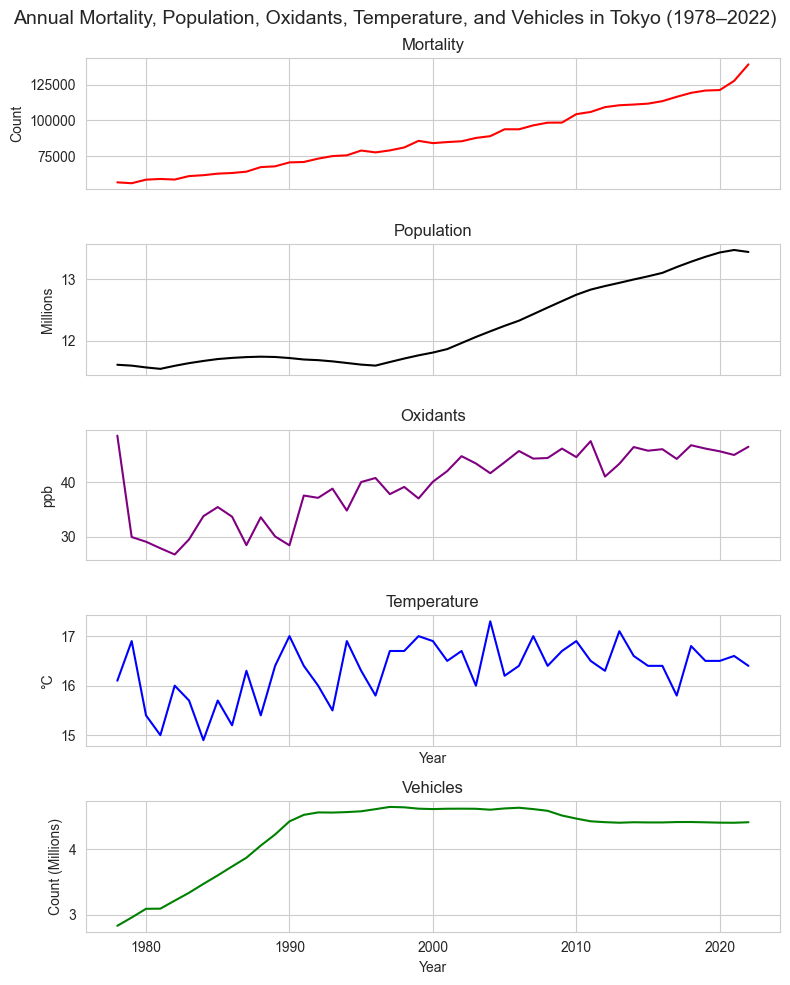

In [5]:
# =============================================================================
# Annual Trends Plot
# =============================================================================
fig, axes = plt.subplots(5, 1, figsize=(8, 10), sharex=True)

axes[0].plot(annual_summary["year"], annual_summary["Deaths"], color="red")
axes[0].set_title("Mortality")
axes[0].set_ylabel("Count")

axes[1].plot(annual_summary["year"], annual_summary["PopulationM"], color="black")
axes[1].set_title("Population")
axes[1].set_ylabel("Millions")

axes[2].plot(annual_summary["year"], annual_summary["Ozone_ppb"], color="purple")
axes[2].set_title("Oxidants")
axes[2].set_ylabel("ppb")

axes[3].plot(annual_summary["year"], annual_summary["Temp_C"], color="blue")
axes[3].set_title("Temperature")
axes[3].set_xlabel("Year")
axes[3].set_ylabel("°C")

axes[4].plot(annual_summary["year"], annual_summary["Vehicles_M"], color="green")
axes[4].set_title("Vehicles")
axes[4].set_xlabel("Year")
axes[4].set_ylabel("Count (Millions)")

fig.suptitle("Annual Mortality, Population, Oxidants, Temperature, and Vehicles in Tokyo (1978–2022)", fontsize=14)
plt.tight_layout()
plt.show()


In [6]:
# =============================================================================
# Data Preparation for Modeling
# =============================================================================
ozone_var = "mean_annual_daytime_peak_ppm_lag1"
df_mort_model = df_mort_ozone_temp_veh.copy()

# Age groups
age_levels = ["0","1-4","5-14","15-24","25-44","45-64","65-74","75-84","85-94","95+"]
df_mort_model["age_group"] = pd.Categorical(df_mort_model["age_group"], categories=age_levels, ordered=False)

# 5 age groups
def age_group5(x):
    if x in ["0","1-4","5-14","15-24","25-44","45-64"]:
        return "0-64"
    elif x=="65-74":
        return "65-74"
    elif x=="75-84":
        return "75-84"
    elif x=="85-94":
        return "85-94"
    elif x=="95+":
        return "95+"

df_mort_model["age_group5"] = df_mort_model["age_group"].apply(age_group5)
df_mort_model["age_group5"] = pd.Categorical(df_mort_model["age_group5"],
                                           categories=["0-64","65-74","75-84","85-94","95+"],
                                           ordered=True)

# 7 age groups
def age_group7(x):
    if x in ["0","1-4","5-14"]:
        return "0-14"
    elif x in ["15-24","25-44"]:
        return "15-44"
    elif x=="45-64":
        return "45-64"
    elif x=="65-74":
        return "65-74"
    elif x=="75-84":
        return "75-84"
    elif x=="85-94":
        return "85-94"
    elif x=="95+":
        return "95+"

df_mort_model["age_group7"] = df_mort_model["age_group"].apply(age_group7)
df_mort_model["age_group7"] = pd.Categorical(df_mort_model["age_group7"],
                                           categories=["0-14","15-44","45-64","65-74","75-84","85-94","95+"],
                                           ordered=True)

# Sex as categorical
df_mort_model["sex"] = pd.Categorical(df_mort_model["sex"], categories=["Female","Male"])

# Scale ozone and temperature
df_mort_model["ozone_10ppb"] = df_mort_model[ozone_var] * 100
df_mort_model["ozone_10ppb_c"] = df_mort_model["ozone_10ppb"] - df_mort_model["ozone_10ppb"].mean()
df_mort_model["temp_c"] = df_mort_model["daily_max_lag1"] - df_mort_model["daily_max_lag1"].mean()
df_mort_model["offset_log_pop"] = np.log(df_mort_model["Population"])

# Filter valid data
dr_mort_model = df_mort_model[(df_mort_model["Deaths"].notna()) &
                          (df_mort_model["Population"].notna()) &
                          (df_mort_model["Population"] > 0)]
dr_mort_model.head()

,year,age_group,Deaths,sex,Population,daily_mean,daily_max,daily_min,max_temp,min_temp,...,filename,filepath,place,vehicles,age_group5,age_group7,ozone_10ppb,ozone_10ppb_c,temp_c,offset_log_pop
620,1978,0,512.69,Female,77688.82,16.1,20.0,12.6,36.3,-2.0,...,e49tph00000005be.xls,/Users/apple/Desktop/2025_research_paper_lam/O...,Tokyo,2828315.0,0-64,0-14,4.847619,0.886907,-0.444444,11.260467
621,1978,1-4,170.16,Female,342693.45,16.1,20.0,12.6,36.3,-2.0,...,e49tph00000005be.xls,/Users/apple/Desktop/2025_research_paper_lam/O...,Tokyo,2828315.0,0-64,0-14,4.847619,0.886907,-0.444444,12.744592
622,1978,5-14,157.11,Female,814168.25,16.1,20.0,12.6,36.3,-2.0,...,e49tph00000005be.xls,/Users/apple/Desktop/2025_research_paper_lam/O...,Tokyo,2828315.0,0-64,0-14,4.847619,0.886907,-0.444444,13.609922
623,1978,15-24,259.40,Female,898877.05,16.1,20.0,12.6,36.3,-2.0,...,e49tph00000005be.xls,/Users/apple/Desktop/2025_research_paper_lam/O...,Tokyo,2828315.0,0-64,15-44,4.847619,0.886907,-0.444444,13.708902
624,1978,25-44,1602.38,Female,1999960.53,16.1,20.0,12.6,36.3,-2.0,...,e49tph00000005be.xls,/Users/apple/Desktop/2025_research_paper_lam/O...,Tokyo,2828315.0,0-64,15-44,4.847619,0.886907,-0.444444,14.508638


In [7]:
# =============================================================================
# Overall Ozone Effect (quasi-Poisson)
# =============================================================================
m_qp = smf.glm(
    formula="Deaths ~ ozone_10ppb_c + sex + age_group7 + temp_c + year",
    data=df_mort_model,
    family=sm.families.Poisson(),
    offset=df_mort_model["offset_log_pop"]
).fit(scale="X2")  # quasi-Poisson approximation

print(m_qp.summary())

# Extract RRs and 95% CI
coefs = m_qp.params
ses = m_qp.bse
RR = np.exp(coefs)
LCL = np.exp(coefs - 1.96 * ses)
UCL = np.exp(coefs + 1.96 * ses)

results = pd.DataFrame({
    "Term": coefs.index,
    "logRR": coefs.values,
    "SE": ses.values,
    "RR": RR.values,
    "LCL": LCL.values,
    "UCL": UCL.values
})
results


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                  900
Model:                            GLM   Df Residuals:                      889
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          255.27
Method:                          IRLS   Log-Likelihood:                -271.30
Date:                Fri, 28 Nov 2025   Deviance:                   1.3061e+05
Time:                        09:43:36   Pearson chi2:                 2.27e+05
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              26.1146    

,Term,logRR,SE,RR,LCL,UCL
0,Intercept,26.114605,2.479938,2.194972e+11,1.700056e+09,2.833967e+13
1,sex[T.Male],0.579205,0.016441,1.784620e+00,1.728028e+00,1.843065e+00
2,age_group7[T.15-44],0.474936,0.099582,1.607911e+00,1.322806e+00,1.954463e+00
3,age_group7[T.45-64],2.468516,0.093266,1.180491e+01,9.832699e+00,1.417271e+01
4,age_group7[T.65-74],3.772644,0.092980,4.349490e+01,3.624869e+01,5.218964e+01
5,age_group7[T.75-84],4.828559,0.092398,1.250307e+02,1.043196e+02,1.498537e+02
6,age_group7[T.85-94],5.959511,0.092776,3.874207e+02,3.230061e+02,4.646811e+02
7,age_group7[T.95+],7.003714,0.098144,1.100714e+03,9.080969e+02,1.334187e+03
8,ozone_10ppb_c,-0.016091,0.025101,9.840383e-01,9.367974e-01,1.033661e+00
9,temp_c,0.016725,0.017410,1.016866e+00,9.827531e-01,1.052163e+00


In [8]:
# =============================================================================
# Extract only age-group coefficients
# =============================================================================

df_rr_age = results[results["Term"].str.contains(r"age_group7\[T\.", regex=True)].copy()
df_rr_age.RR = df_rr_age.RR.divide(1000)

# Check if it was extracted correctly
print(df_rr_age[["Term", "RR", "LCL", "UCL"]])

                  Term        RR         LCL          UCL
2  age_group7[T.15-44]  0.001608    1.322806     1.954463
3  age_group7[T.45-64]  0.011805    9.832699    14.172707
4  age_group7[T.65-74]  0.043495   36.248694    52.189635
5  age_group7[T.75-84]  0.125031  104.319572   149.853686
6  age_group7[T.85-94]  0.387421  323.006056   464.681098
7    age_group7[T.95+]  1.100714  908.096899  1334.186781


ValueError: 'yerr' must not contain negative values

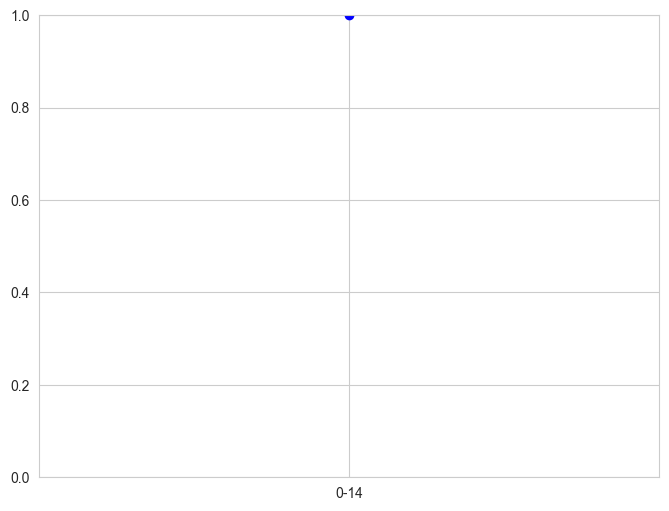

In [9]:
# =============================================================================
# Plot Relative Risk (per 10 ppb ozone) by Age Group
# =============================================================================

# Clean labels for plotting
df_rr_age["age_group7"] = (
    df_rr_age["Term"]
    .str.replace(r"age_group7\[T\.", "", regex=True)
    .str.replace(r"\]", "", regex=True)
)

# Ensure the age_group7 column is categorical with the correct order
df_rr_age["age_group7"] = pd.Categorical(
    df_rr_age["age_group7"],
    categories=["15-44", "45-64", "65-74", "75-84", "85-94", "95+"],
    ordered=True
)

# Add reference group for plotting
ref_group = pd.DataFrame({
    "age_group7": ["0-14"],
    "RR": [1.0],
    "LCL": [1.0],
    "UCL": [1.0]
})

df_rr_age_plot = pd.concat([ref_group, df_rr_age], ignore_index=True)

# Make sure the full DataFrame has categorical ordering
df_rr_age_plot["age_group7"] = pd.Categorical(
    df_rr_age_plot["age_group7"],
    categories=["0-14", "15-44", "45-64", "65-74", "75-84", "85-94", "95+"],
    ordered=True
)

plt.figure(figsize=(8, 6))

# Plot RR with error bars using the full plot DataFrame
plt.errorbar(
    df_rr_age_plot["age_group7"],
    df_rr_age_plot["RR"],
    yerr=[
        df_rr_age_plot["RR"] - df_rr_age_plot["LCL"],
        df_rr_age_plot["UCL"] - df_rr_age_plot["RR"]
    ],
    fmt="o",
    capsize=5,
    color='blue',
    label='Relative Risk (RR)'
)

# Horizontal line at RR = 1
plt.axhline(1, color="gray", linestyle="--", linewidth=1)

# Fix y-axis limits between 0.6 and 1.4
y_max = max(df_rr_age_plot["UCL"].max(), 1.0) * 1.1
y_min = min(df_rr_age_plot["LCL"].min(), 1.0) * 0.9
plt.ylim(y_min, y_max)

plt.title("Relative Risk (per 10 ppb Ozone) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Relative Risk (per 10 ppb ozone)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# =============================================================================
# Sex-Specific Ozone Effect
# =============================================================================
m_qp_sex = smf.glm(
    formula="Deaths ~ ozone_10ppb_c * sex + age_group7 + temp_c + year",
    data=df_mort_model,
    family=sm.families.Poisson(),
    offset=dr_mort_model["offset_log_pop"]
).fit(scale="X2")

coefs = m_qp_sex.params
vcov = m_qp_sex.cov_params()

# Female
b_f = coefs["ozone_10ppb_c"]
se_f = np.sqrt(vcov.loc["ozone_10ppb_c","ozone_10ppb_c"])
z_f = b_f / se_f
p_f = 2 * norm.sf(abs(z_f))
RR_f = np.exp(b_f)
CI_f = np.exp([b_f - 1.96*se_f, b_f + 1.96*se_f])

# Male
b_m = b_f + coefs["ozone_10ppb_c:sex[T.Male]"]
var_m = (vcov.loc["ozone_10ppb_c","ozone_10ppb_c"] +
         vcov.loc["ozone_10ppb_c:sex[T.Male]","ozone_10ppb_c:sex[T.Male]"] +
         2*vcov.loc["ozone_10ppb_c","ozone_10ppb_c:sex[T.Male]"])
se_m = np.sqrt(var_m)
z_m = b_m / se_m
p_m = 2 * norm.sf(abs(z_m))
RR_m = np.exp(b_m)
CI_m = np.exp([b_m - 1.96*se_m, b_m + 1.96*se_m])

sex_rr = pd.DataFrame({
    "sex": ["Female","Male"],
    "logRR": [b_f, b_m],
    "SE": [se_f, se_m],
    "z": [z_f, z_m],
    "pval": [p_f, p_m],
    "RR": [RR_f, RR_m],
    "LCL": [CI_f[0], CI_m[0]],
    "UCL": [CI_f[1], CI_m[1]]
})
sex_rr


,sex,logRR,SE,z,pval,RR,LCL,UCL
0,Female,-0.050163,0.029271,-1.713768,0.086571,0.951074,0.898047,1.007233
1,Male,0.010306,0.027743,0.371497,0.710268,1.010360,0.956887,1.066821


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                  900
Model:                            GLM   Df Residuals:                      870
Model Family:                 Poisson   Df Model:                           29
Link Function:                    Log   Scale:                          277.63
Method:                          IRLS   Log-Likelihood:                -412.86
Date:                Fri, 28 Nov 2025   Deviance:                   2.2135e+05
Time:                        09:26:02   Pearson chi2:                 2.42e+05
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

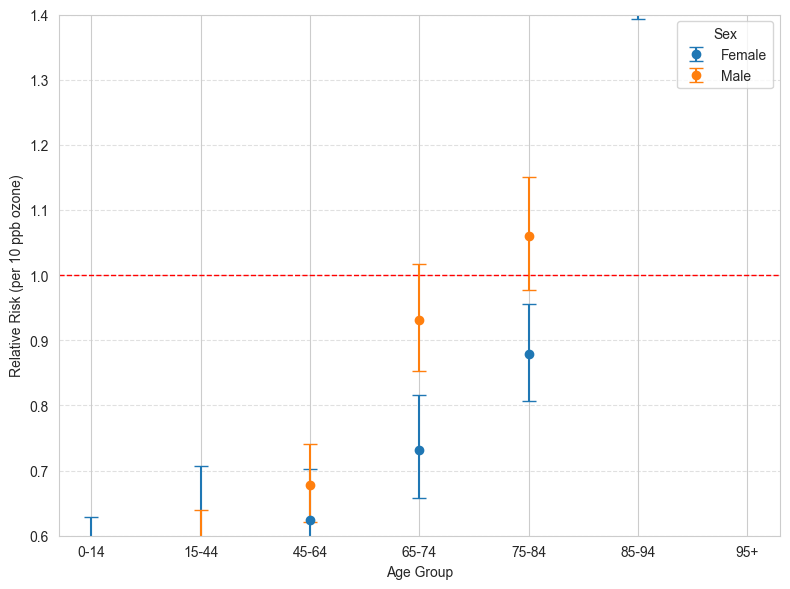

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
import matplotlib.pyplot as plt

# ===========================
# Ensure factors are categorical
# ===========================
df_mort_model['age_group7'] = pd.Categorical(
    df_mort_model['age_group7'],
    categories=["0-14","15-44","45-64","65-74","75-84","85-94","95+"],
    ordered=True
)
df_mort_model['sex'] = pd.Categorical(
    df_mort_model['sex'],
    categories=["Female","Male"]
)

# ===========================
# Fit quasi-Poisson GLM with log link
# ===========================
formula = "Deaths ~ ozone_10ppb_c * age_group7 * sex + temp_c + np.poly1d(np.polyfit(year, year, 3))(year)"
m_qp_age7_sex = smf.glm(
    formula=formula,
    data=df_mort_model,
    family=sm.families.Poisson(),
).fit(scale='X2')

print(m_qp_age7_sex.summary())

# ===========================
# Helper functions to mimic R find_term and make_L
# ===========================
def find_term(all_names, parts):
    for name in all_names:
        split_name = name.split(':')
        if set(parts) == set(split_name):
            return name
    return None

def make_L(all_names, term_names):
    L = np.zeros(len(all_names))
    for tn in term_names:
        if tn is not None:
            idx = all_names.index(tn)
            L[idx] = 1
    return L

# ===========================
# Compute age-sex-specific RR
# ===========================
coefs = m_qp_age7_sex.params.values
V = m_qp_age7_sex.cov_params().values
coef_names = list(m_qp_age7_sex.params.index)

ages = df_mort_model['age_group7'].cat.categories
sexes = df_mort_model['sex'].cat.categories

res = []

base_var = 'ozone_10ppb_c'
age_fac = 'age_group7'
sex_fac = 'sex'

for a in ages:
    for s in sexes:
        # Base ozone term
        t_base = find_term(coef_names, [base_var])
        
        # Two-way interactions
        t_age = find_term(coef_names, [base_var, f'{age_fac}[T.{a}]']) if a != ages[0] else None
        t_sex = find_term(coef_names, [base_var, f'{sex_fac}[T.{s}]']) if s != sexes[0] else None
        
        # Three-way interaction
        t_3way = find_term(coef_names, [base_var, f'{age_fac}[T.{a}]', f'{sex_fac}[T.{s}]']) if a != ages[0] and s != sexes[0] else None
        
        # Build contrast
        L = make_L(coef_names, [t_base, t_age, t_sex, t_3way])
        beta = np.dot(L, coefs)
        varb = np.dot(L.T, np.dot(V, L))
        se = np.sqrt(varb)
        z = beta / se
        p = 2 * (1 - norm.cdf(abs(z)))
        
        res.append({
            'age_group7': a,
            'sex': s,
            'logRR': beta,
            'SE': se,
            'z': z,
            'p': p,
            'RR': np.exp(beta),
            'LCL': np.exp(beta - 1.96*se),
            'UCL': np.exp(beta + 1.96*se)
        })

age_sex_rr7 = pd.DataFrame(res)

# ===========================
# Plot Relative Risk by Age and Sex
# ===========================
plt.figure(figsize=(8,6))

for sex in sexes:
    subset = age_sex_rr7[age_sex_rr7['sex']==sex]
    plt.errorbar(
        subset['age_group7'],
        subset['RR'],
        yerr=[subset['RR']-subset['LCL'], subset['UCL']-subset['RR']],
        fmt='o', capsize=5, label=sex
    )

plt.axhline(1, color='red', linestyle='--', linewidth=1)
plt.ylabel('Relative Risk (per 10 ppb ozone)')
plt.xlabel('Age Group')
plt.ylim(0.6, 1.4)
plt.legend(title='Sex')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:

# =============================================================================
# Ensure factors have correct order
# =============================================================================
age_order = ["0-14","15-44","45-64","65-74","75-84","85-94","95+"]
sex_order = ["Female","Male"]

df = df_mort_model.copy()
df["age_group7"] = pd.Categorical(df["age_group7"], categories=age_order, ordered=True)
df["sex"] = pd.Categorical(df["sex"], categories=sex_order, ordered=True)

# =============================================================================
# Fit GLM (quasi-Poisson approximation using scale='X2')
# =============================================================================

formula = "Deaths ~ ozone_10ppb_c * age_group7 * sex + temp_c + np.poly1d(np.polyfit(year, year, 3))(year)"
m_qp_age7_sex = smf.glm(
    formula="Deaths ~ ozone_10ppb_c * age_group7 * sex + temp_c + np.poly1d(np.polyfit(year, year, 3))(year)",
    data=df,
    family=sm.families.Poisson(),
    offset=np.log(df["offset_log_pop"])
).fit(scale="X2")  # quasi-Poisson approximation

print(m_qp_age7_sex.summary())

# =============================================================================
# Extract coefficients and covariance
# =============================================================================
coefs = m_qp_age7_sex.params
V = m_qp_age7_sex.cov_params()
coef_names = coefs.index

# =============================================================================
# Helper functions to find terms and build contrast vectors
# =============================================================================
def find_term(all_names, parts):
    """Find coefficient name that contains all parts (order-agnostic)."""
    for nm in all_names:
        subs = nm.split(":")
        if all(part in subs for part in parts) and len(subs) == len(parts):
            return nm
    return None

def make_L(all_names, term_names):
    """Build contrast vector for selected terms."""
    L = pd.Series(0, index=all_names, dtype=float)
    for tn in term_names:
        if tn is not None:
            L[tn] = L.get(tn, 0) + 1
    return L

# =============================================================================
# Compute age- and sex-specific RR
# =============================================================================
base_var = "ozone_10ppb_c"
res_list = []

for a in age_order:
    for s in sex_order:
        t_base = find_term(coef_names, [base_var])
        t_age = find_term(coef_names, [base_var, f"age_group7[T.{a}]"]) if a != age_order[0] else None
        t_sex = find_term(coef_names, [base_var, f"sex[T.{s}]"]) if s != sex_order[0] else None
        t_3way = find_term(coef_names, [base_var, f"age_group7[T.{a}]", f"sex[T.{s}]"]) \
                 if a != age_order[0] and s != sex_order[0] else None

        L = make_L(coef_names, [t_base, t_age, t_sex, t_3way])
        beta = float(np.dot(L, coefs))
        varb = float(L.T @ V @ L)
        if varb < 0 and varb > -1e-12:
            varb = 0.0
        se = np.sqrt(varb)
        z = beta / se
        p = 2 * (1 - norm.cdf(abs(z)))
        res_list.append({
            "age_group7": a,
            "sex": s,
            "logRR": beta,
            "SE": se,
            "z": z,
            "p": p,
            "RR": np.exp(beta),
            "LCL": np.exp(beta - 1.96 * se),
            "UCL": np.exp(beta + 1.96 * se)
        })

age_sex_rr7 = pd.DataFrame(res_list)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                  900
Model:                            GLM   Df Residuals:                      870
Model Family:                 Poisson   Df Model:                           29
Link Function:                    Log   Scale:                          243.02
Method:                          IRLS   Log-Likelihood:                -417.60
Date:                Fri, 28 Nov 2025   Deviance:                   1.9507e+05
Time:                        09:26:02   Pearson chi2:                 2.11e+05
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

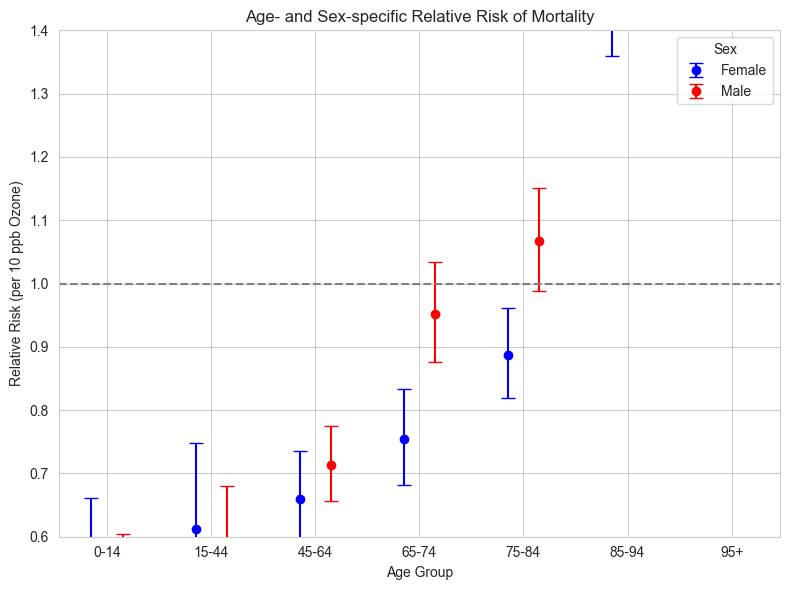

In [ ]:
# =============================================================================
# Plot
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Define dodge offset
dodge = 0.15
x_vals = np.arange(len(age_order))  # numeric positions for age groups

for i, sex in enumerate(["Female", "Male"]):
    subset = age_sex_rr7[age_sex_rr7["sex"] == sex].sort_values("age_group7")
    offset = -dodge if sex == "Female" else dodge
    plt.errorbar(
        x=x_vals + offset,
        y=subset["RR"],
        yerr=[subset["RR"] - subset["LCL"], subset["UCL"] - subset["RR"]],
        fmt='o',
        capsize=5,
        label=sex,
        color='blue' if sex == "Female" else 'red'
    )

plt.xticks(x_vals, age_order)
plt.axhline(1, color="gray", linestyle="--")
plt.xlabel("Age Group")
plt.ylabel("Relative Risk (per 10 ppb Ozone)")
plt.title("Age- and Sex-specific Relative Risk of Mortality")
plt.legend(title="Sex")
plt.ylim(0.6, 1.4)  # optional, same as R
plt.tight_layout()
plt.show()


In [ ]:
# =============================================================================
# Vehicle as Explainer Variable for Ozone
# =============================================================================

#Centre the vehicle variable
annual_summary["Vehicles_M_c"] = annual_summary["Vehicles_M"] - annual_summary["Vehicles_M"].mean()


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ensure Vehicles_M_c is added to df_mort_mod
dr_mort_model_veh = df_mort_model.copy()

dr_mort_model_veh = dr_mort_model.merge(
    annual_summary[['year', 'Vehicles_M']],
    on='year',
    how='left'  # ensure all rows in df_mort_mod are retained
)

In [ ]:
# Center the Vehicles_M variable
dr_mort_model_veh['Vehicles_M_centred'] = dr_mort_model_veh['Vehicles_M'] - dr_mort_model_veh['Vehicles_M'].mean()

# Quick check
dr_mort_model_veh[['year', 'Vehicles_M', 'Vehicles_M_centred']].head()

,year,Vehicles_M,Vehicles_M_centred
0,1978,2.828315,-1.411888
1,1978,2.828315,-1.411888
2,1978,2.828315,-1.411888
3,1978,2.828315,-1.411888
4,1978,2.828315,-1.411888


In [ ]:

m_qp_veh = smf.glm(
    formula="Deaths ~ ozone_10ppb_c * Vehicles_M + sex + age_group7 + temp_c + year",
    data=dr_mort_model_veh,
    family=sm.families.Poisson(),
    offset=dr_mort_model_veh["offset_log_pop"]
).fit(scale="X2")  # quasi-Poisson approximation

print(m_qp_veh.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                  900
Model:                            GLM   Df Residuals:                      887
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          254.92
Method:                          IRLS   Log-Likelihood:                -270.81
Date:                Fri, 28 Nov 2025   Deviance:                   1.3017e+05
Time:                        09:26:02   Pearson chi2:                 2.26e+05
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
RR_overall = pd.DataFrame({
    "Term": ["ozone_10ppb_c", "Vehicles_M"],
    "RR": np.exp([m_qp_veh.params["ozone_10ppb_c"], m_qp_veh.params["Vehicles_M"]]),
    "LCL": np.exp([m_qp_veh.params["ozone_10ppb_c"] - 1.96*m_qp_veh.bse["ozone_10ppb_c"],
                   m_qp_veh.params["Vehicles_M"] - 1.96*m_qp_veh.bse["Vehicles_M"]]),
    "UCL": np.exp([m_qp_veh.params["ozone_10ppb_c"] + 1.96*m_qp_veh.bse["ozone_10ppb_c"],
                   m_qp_veh.params["Vehicles_M"] + 1.96*m_qp_veh.bse["Vehicles_M"]])
})

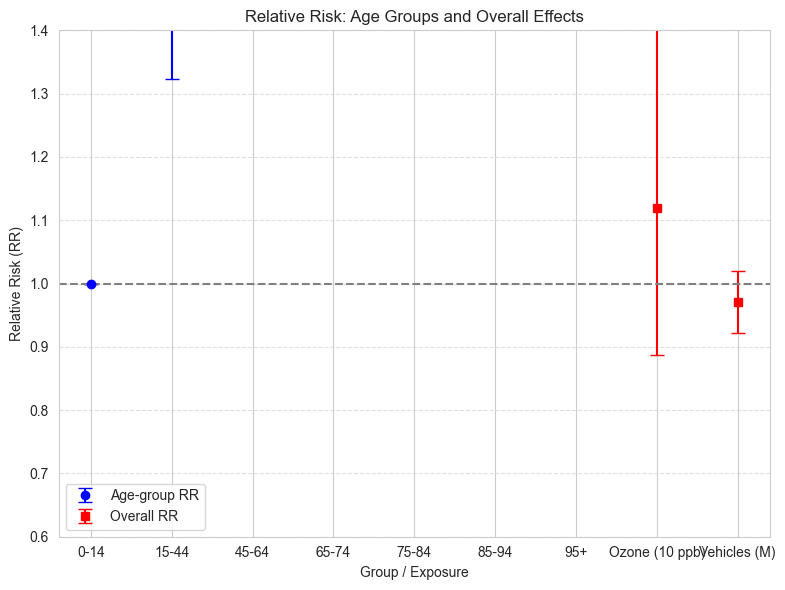

In [ ]:
plt.figure(figsize=(8,6))

# Age-group RR
plt.errorbar(
    df_rr_age_plot["age_group7"], df_rr_age_plot["RR"],
    yerr=[df_rr_age_plot["RR"] - df_rr_age_plot["LCL"], df_rr_age_plot["UCL"] - df_rr_age_plot["RR"]],
    fmt="o", capsize=5, color='blue', label="Age-group RR"
)

# Overall RR for ozone and vehicles
plt.errorbar(
    ["Ozone (10 ppb)", "Vehicles (M)"], RR_overall["RR"],
    yerr=[RR_overall["RR"] - RR_overall["LCL"], RR_overall["UCL"] - RR_overall["RR"]],
    fmt="s", capsize=5, color='red', label="Overall RR"
)

plt.axhline(1, color="gray", linestyle="--")
plt.ylim(0.6, 1.4)
plt.title("Relative Risk: Age Groups and Overall Effects")
plt.ylabel("Relative Risk (RR)")
plt.xlabel("Group / Exposure")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
RR predict amt of deaths per year based on ozone levels